# About Dataset
Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

#content

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: 1 for female and 2 for male.

age: of the patient.

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different

degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

pneumonia: whether the patient already have air sacs inflammation or not.

pregnancy: whether the patient is pregnant or not.

diabetes: whether the patient has diabetes or not.

copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

asthma: whether the patient has asthma or not.

inmsupr: whether the patient is immunosuppressed or not.

hypertension: whether the patient has hypertension or not.

cardiovascular: whether the patient has heart or blood vessels related disease.

renal chronic: whether the patient has chronic renal disease or not.

other disease: whether the patient has other disease or not.

obesity: whether the patient is obese or not.

tobacco: whether the patient is a tobacco user.

usmr: Indicates whether the patient treated medical units of the first, second or third level.

medical unit: type of institution of the National Health System that provided the care.

intubed: whether the patient was connected to the ventilator.

icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Contains a vast number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 different features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

In [24]:
# Data Loading and Managing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Data Visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Model 
import xgboost as xgb
from sklearn.svm import SVR

from sklearn.tree import  DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
covid_data = pd.read_csv('Covid Risk Data.csv')
covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [26]:
# Dimensions of the dataset
covid_data.shape

(1048575, 21)

In [27]:
# Information about the data features.
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [28]:
# datatypes and columns that lies under it
covid_data.columns.to_series().groupby(covid_data.dtypes).groups

{int64: ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'], object: ['DATE_DIED']}

In [29]:
# Percentage presence of Null values
covid_data.isnull().sum()/len(covid_data)

USMER                   0.0
MEDICAL_UNIT            0.0
SEX                     0.0
PATIENT_TYPE            0.0
DATE_DIED               0.0
INTUBED                 0.0
PNEUMONIA               0.0
AGE                     0.0
PREGNANT                0.0
DIABETES                0.0
COPD                    0.0
ASTHMA                  0.0
INMSUPR                 0.0
HIPERTENSION            0.0
OTHER_DISEASE           0.0
CARDIOVASCULAR          0.0
OBESITY                 0.0
RENAL_CHRONIC           0.0
TOBACCO                 0.0
CLASIFFICATION_FINAL    0.0
ICU                     0.0
dtype: float64

<AxesSubplot:>

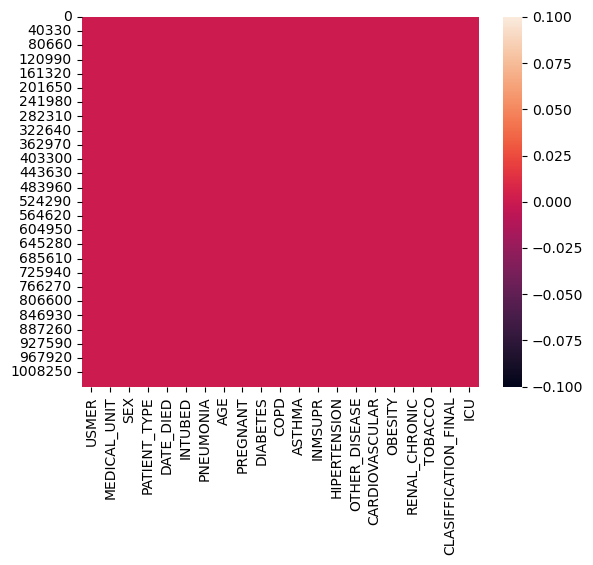

In [30]:
# Visual representation for checking presence of Null values
sns.heatmap(covid_data.isnull())

<AxesSubplot:>

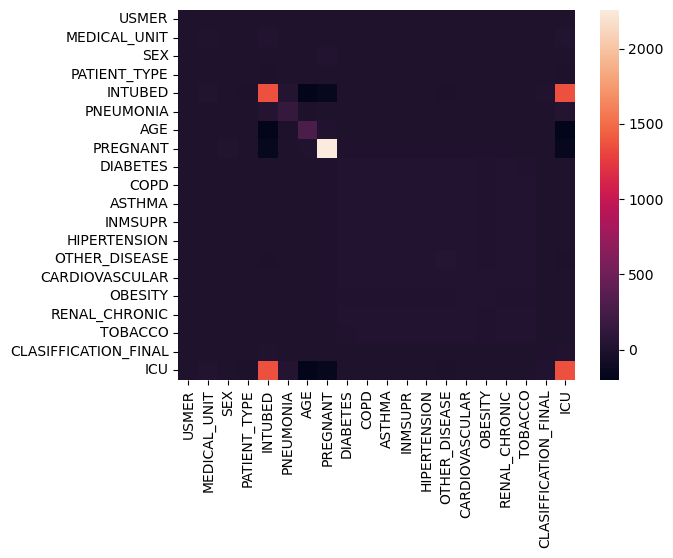

In [31]:
sns.heatmap(covid_data.cov())

In [32]:
covid_data.cov()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,0.232525,0.229679,-0.000271,-0.036106,3.119353,-0.890108,-0.367597,-0.033661,0.038461,0.027296,0.026669,0.008519,0.037447,-0.050522,0.025294,0.036354,0.028545,0.027305,0.026161,3.105608
MEDICAL_UNIT,0.229679,13.862797,0.002746,-0.300496,28.174397,-2.059535,-5.176016,0.937575,0.394277,0.271518,0.253485,0.239702,0.408727,0.679390,0.278645,0.377248,0.282048,0.243429,0.560198,28.125351
SEX,-0.000271,0.002746,0.250000,0.017584,-1.658054,-0.072257,0.239807,23.582252,0.024104,0.024050,0.026633,0.021849,0.024237,0.030041,0.021231,0.025510,0.021180,0.013092,-0.054349,-1.654174
PATIENT_TYPE,-0.036106,-0.300496,0.017584,0.154374,-14.143121,0.107496,2.093821,1.649055,0.018632,0.039418,0.046299,0.053497,0.014098,0.095904,0.045260,0.039958,0.038079,0.046269,-0.135532,-14.117955
INTUBED,3.119353,28.174397,-1.658054,-14.143121,1359.314775,35.024217,-198.193352,-154.317377,-1.842779,-3.807875,-4.420808,-4.861956,-1.472615,-8.675961,-4.298347,-3.857608,-3.655945,-4.401548,13.391011,1356.857772
PNEUMONIA,-0.890108,-2.059535,-0.072257,0.107496,35.024217,141.916736,-14.728983,-4.122608,-0.289717,-0.343478,-0.328490,-0.052179,-0.299366,0.127605,-0.294467,-0.263635,-0.323431,-0.274281,1.688628,34.957933
AGE,-0.367597,-5.176016,0.239807,2.093821,-198.193352,-14.728983,285.859810,21.895451,0.405512,1.652892,1.964110,2.107728,-0.439498,2.566334,1.711714,1.356265,1.747250,1.913623,-4.854725,-197.864353
PREGNANT,-0.033661,0.937575,23.582252,1.649055,-154.317377,-4.122608,21.895451,2257.269723,3.790239,3.836962,4.073432,3.702294,3.815202,4.476357,3.548652,3.908301,3.511511,2.729729,-5.166753,-153.939831
DIABETES,0.038461,0.394277,0.024104,0.018632,-1.842779,-0.289717,0.405512,3.790239,29.422399,23.073269,23.006189,23.145629,23.717416,22.879728,22.807866,21.131551,22.636880,22.283718,-0.048354,-1.842205
COPD,0.027296,0.271518,0.024050,0.039418,-3.807875,-0.343478,1.652892,3.836962,23.073269,26.340073,23.856502,23.894940,22.984414,23.446277,23.464547,21.644297,23.299508,22.841772,-0.099795,-3.807342


<AxesSubplot:>

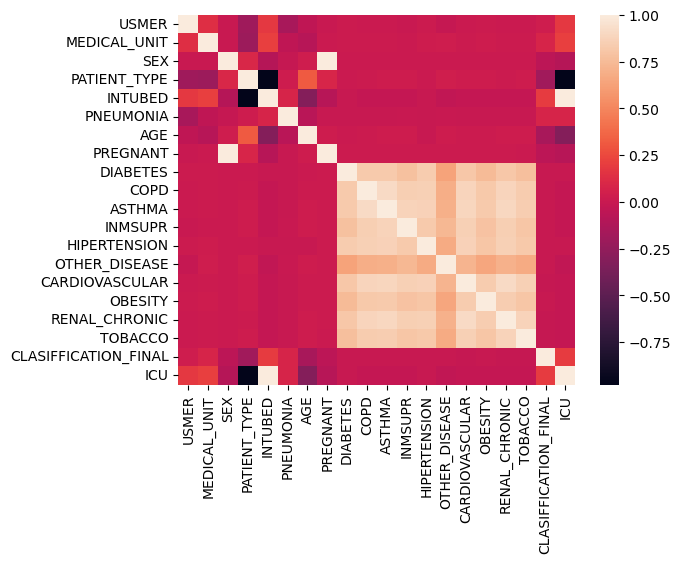

In [33]:
sns.heatmap(covid_data.corr())

In [34]:
covid_data.corr()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


In [35]:
# Statistical summary of numerical columns
covid_data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [36]:
# Statistical summary of categorical columns
covid_data.describe(include='object')

,DATE_DIED
count,1048575
unique,401
top,9999-99-99
freq,971633


In [37]:
# Checking for duplicate records
covid_data[covid_data.duplicated()]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
35,2,1,2,1,9999-99-99,97,2,45,97,2,...,2,2,2,2,2,2,2,2,3,97
62,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,7,2
63,2,1,2,1,9999-99-99,97,2,33,97,2,...,2,2,2,2,2,2,2,2,7,97
75,2,1,1,1,9999-99-99,97,2,24,2,2,...,2,2,2,2,2,2,2,2,7,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048556,2,13,2,1,9999-99-99,97,2,31,97,2,...,2,2,2,2,2,2,2,2,7,97
1048558,1,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048566,2,13,2,1,9999-99-99,97,2,24,97,2,...,1,2,2,2,2,2,2,2,7,97
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97


In [38]:
a = covid_data.columns
a

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [39]:
covid_data["DATE_DIED"].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [40]:
covid_num=covid_data.select_dtypes(include='number')
covid_num.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [41]:
len(covid_num.columns)

20

In [42]:
for i in covid_num.columns:                      ## percentage of observations in each numerical feature
    print(covid_num[i].value_counts()/len(covid_data)*100)
    print("\n")

2    63.219417
1    36.780583
Name: USMER, dtype: float64


12    57.506139
4     29.984026
6      3.870396
9      3.635028
3      1.828672
8      0.991727
10     0.750829
5      0.690842
11     0.531865
13     0.094986
7      0.084972
2      0.016117
1      0.014400
Name: MEDICAL_UNIT, dtype: float64


1    50.074053
2    49.925947
Name: SEX, dtype: float64


1    80.923539
2    19.076461
Name: PATIENT_TYPE, dtype: float64


97    80.923539
2     15.168204
1      3.209689
99     0.698567
Name: INTUBED, dtype: float64


2     85.118756
1     13.355077
99     1.526166
Name: PNEUMONIA, dtype: float64


30     2.575877
31     2.472594
28     2.414038
29     2.396967
34     2.371981
         ...   
114    0.000191
116    0.000191
111    0.000095
121    0.000095
113    0.000095
Name: AGE, Length: 121, dtype: float64


97    49.925947
2     48.940610
1      0.775433
98     0.358010
Name: PREGNANT, dtype: float64


2     87.761772
1     11.919891
98     0.318337
Name: DIABETES, dtype: float64

In [43]:
covid_data.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

# Data Cleaning

In [44]:
#AGE

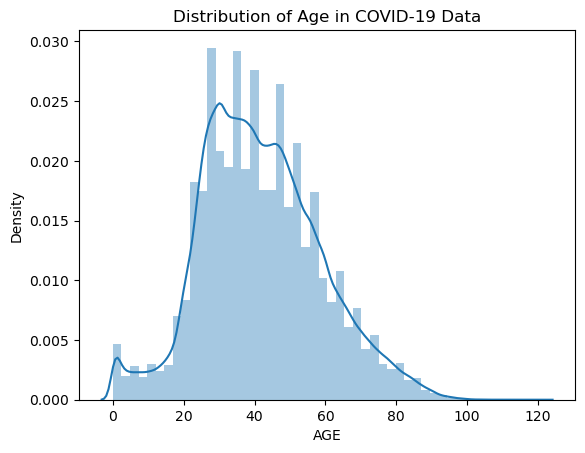

In [45]:
age_data = covid_data['AGE']
sns.distplot(age_data, kde=True)

plt.xlabel('AGE')
plt.ylabel('Density')
plt.title('Distribution of Age in COVID-19 Data')

plt.show()

<AxesSubplot:xlabel='AGE'>

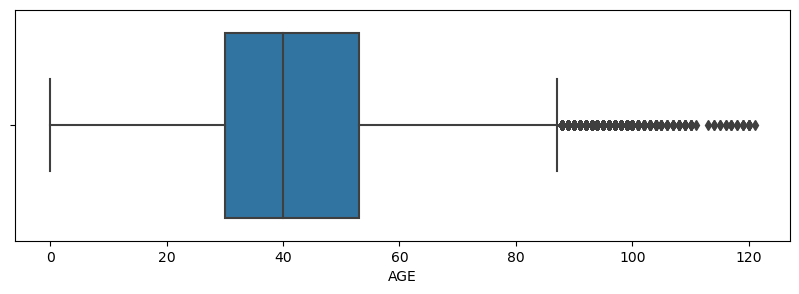

In [46]:
plt.figure(figsize=(10,3))
sns.boxplot(covid_data['AGE'])

In [47]:
#most people are in the age between 20 to 60

In [48]:
covid_data.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

Upon examination, we find that the "PREGNANT" attribute contains the value 97 for all males, which is incorrect since males cannot be pregnant. To rectify this, we will replace all occurrences of 97 with the value 2. Additionally, some females have the value 98, indicating missing data. To address this, we will change all instances of 98 to NAN.

Currently, the boolean representation in the dataset uses 1 to signify "True" and 2 to signify "False." To adhere to the conventional convention, we will modify all occurrences of 2 to be replaced by 0.

In [49]:
covid_data['PREGNANT'] = covid_data['PREGNANT'].replace({97: np.nan, 98: np.nan, 2: 0})

covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,0.0,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,NaN,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,NaN,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,0.0,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,NaN,1,...,2,2,1,2,2,2,2,2,3,97


In [50]:
covid_data['PREGNANT'] = covid_data['PREGNANT'].replace({np.nan: 0})

In [51]:
covid_data.PREGNANT.value_counts()

0.0    1040444
1.0       8131
Name: PREGNANT, dtype: int64

In [52]:
covid_data.replace({97:0,98:0,99:0},inplace=True)
covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,0,1,65,0.0,2,...,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,03/06/2020,0,1,72,0.0,2,...,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,09/06/2020,1,2,55,0.0,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,0,2,53,0.0,2,...,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,21/06/2020,0,2,68,0.0,1,...,2,2,1,2,2,2,2,2,3,0


In [53]:
covid_data.PREGNANT.value_counts()

0.0    1040444
1.0       8131
Name: PREGNANT, dtype: int64

In [54]:
covid_data['PREGNANT'] = covid_data['PREGNANT'].replace({0.0: 0, 1.0 : 1})

In [55]:
covid_data.DIABETES.value_counts()

2    920248
1    124989
0      3338
Name: DIABETES, dtype: int64

In [56]:
covid_data['DATE_DIED']=covid_data['DATE_DIED'].apply(lambda x: 0 if x=='9999-99-99'  else 1)
covid_data['DATE_DIED'].value_counts()

0    971633
1     76942
Name: DATE_DIED, dtype: int64

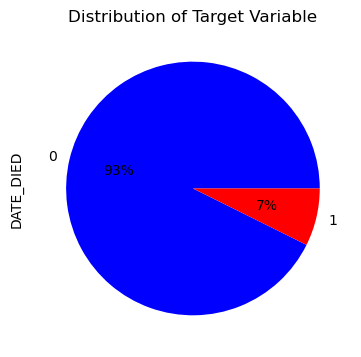

In [57]:
# Visual representation of Value counts of the customers that have exited in precentage using Pie Plot.
fig = plt.figure(figsize=(9,6))
plt.subplot(121)
covid_data['DATE_DIED'].value_counts().plot.pie(autopct = '%1.0f%%' , colors=['blue','red'])
plt.title("Distribution of Target Variable")
plt.show()

In [58]:
covid_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,0,1,65,0.0,2,...,2,2,1,2,2,2,2,2,3,0
1,2,1,2,1,1,0,1,72,0.0,2,...,2,2,1,2,2,1,1,2,5,0
2,2,1,2,2,1,1,2,55,0.0,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,1,0,2,53,0.0,2,...,2,2,2,2,2,2,2,2,7,0
4,2,1,2,1,1,0,2,68,0.0,1,...,2,2,1,2,2,2,2,2,3,0
